# EECS 3401: Project

## Author: Harsh Parmar & Shubhkumar Patel

**Dataset Source: Suraj, (2023) . _Car Sales Data_ . Kaggle . https://www.kaggle.com/datasets/suraj520/car-sales-data**

**Modified Dataset: _Car Sales Data_ . https://media.githubusercontent.com/media/ParmarHarsh/Project-Group-50/main/car_sales_data.csv**

# Car Sales Data

**Attributes for car-sales-data.csv dataset:**

The below attributes are copied from the original dataset.
1. Date: The date of the car sale
2. Salesperson: The name of the salesperson who made the sale
3. Customer Name: The name of the customer who purchased the car
4. Car Make: The make of the car that was purchased
5. Car Model: The model of the car that was purchased
6. Car Year: The year of the car that was purchased
7. Sale Price: The sale price of the car in USD
8. Commission Rate: The commission rate paid to the salesperson on the sale
9. Commission Earned: The amount of commission earned by the salesperson on the sale

## 1 - Look at the big picture & frame the problem.

### Look at the big picture

- Predicting future car sales aids manufacturers in planning production, managing inventory, and optimizing marketing strategies based on historical sales data.

### Frame the problem

- Supervised learning: Using labeled historical data to predict sales figures constitutes a supervised learning problem.
- A regression task: Forecasting sales figures from available attributes aligns with regression.
- Batch learning: Leveraging the entire dataset to train models for predicting future sales represents batch learning.

## 2 - Load the dataset.

In [1]:
# Import libraries.
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset.
url = "https://media.githubusercontent.com/media/ParmarHarsh/Project-Group-50/main/car_sales_data.csv"
cars = pd.read_csv(url, sep=',')

# Create a backup copy of the dataset.
cars_backup = cars

### 2.1 - Take a quick look at the data structure.

In [2]:
cars

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85
...,...,...,...,...,...,...,...,...,...
2499995,2022-05-26,Isabella Moore,Shirley Lee,Chevrolet,Silverado,2021,49823,0.062977,3137.70
2499996,2022-10-03,Kimberly Snow,Tara Rodgers,Ford,F-150,2022,18803,0.068339,1284.97
2499997,2022-06-07,Jessica Young,Jennifer Moore,Chevrolet,Civic,2010,30863,0.088915,2744.19
2499998,2023-02-15,Donald Barber,Ashley Diaz,Honda,Silverado,2014,26125,0.088260,2305.80


In [3]:
cars.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [4]:
cars.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03
std,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03
min,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03
50%,2.016000e+03,3.000600e+04,1.000058e-01,2.741910e+03
75%,2.019000e+03,4.002200e+04,1.250065e-01,3.978142e+03
max,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03


In [5]:
cars['Date'] = pd.to_datetime(cars['Date'])
cars['Date'] = cars['Date'].dt.strftime('%Y-%m-%d')

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


In [6]:
cars.shape

(2500000, 9)

### 2.2 - Create a test set.

## 3 - Explore and visualize the data to gain insights.

### 3.1 - Plot a histogram of the data.

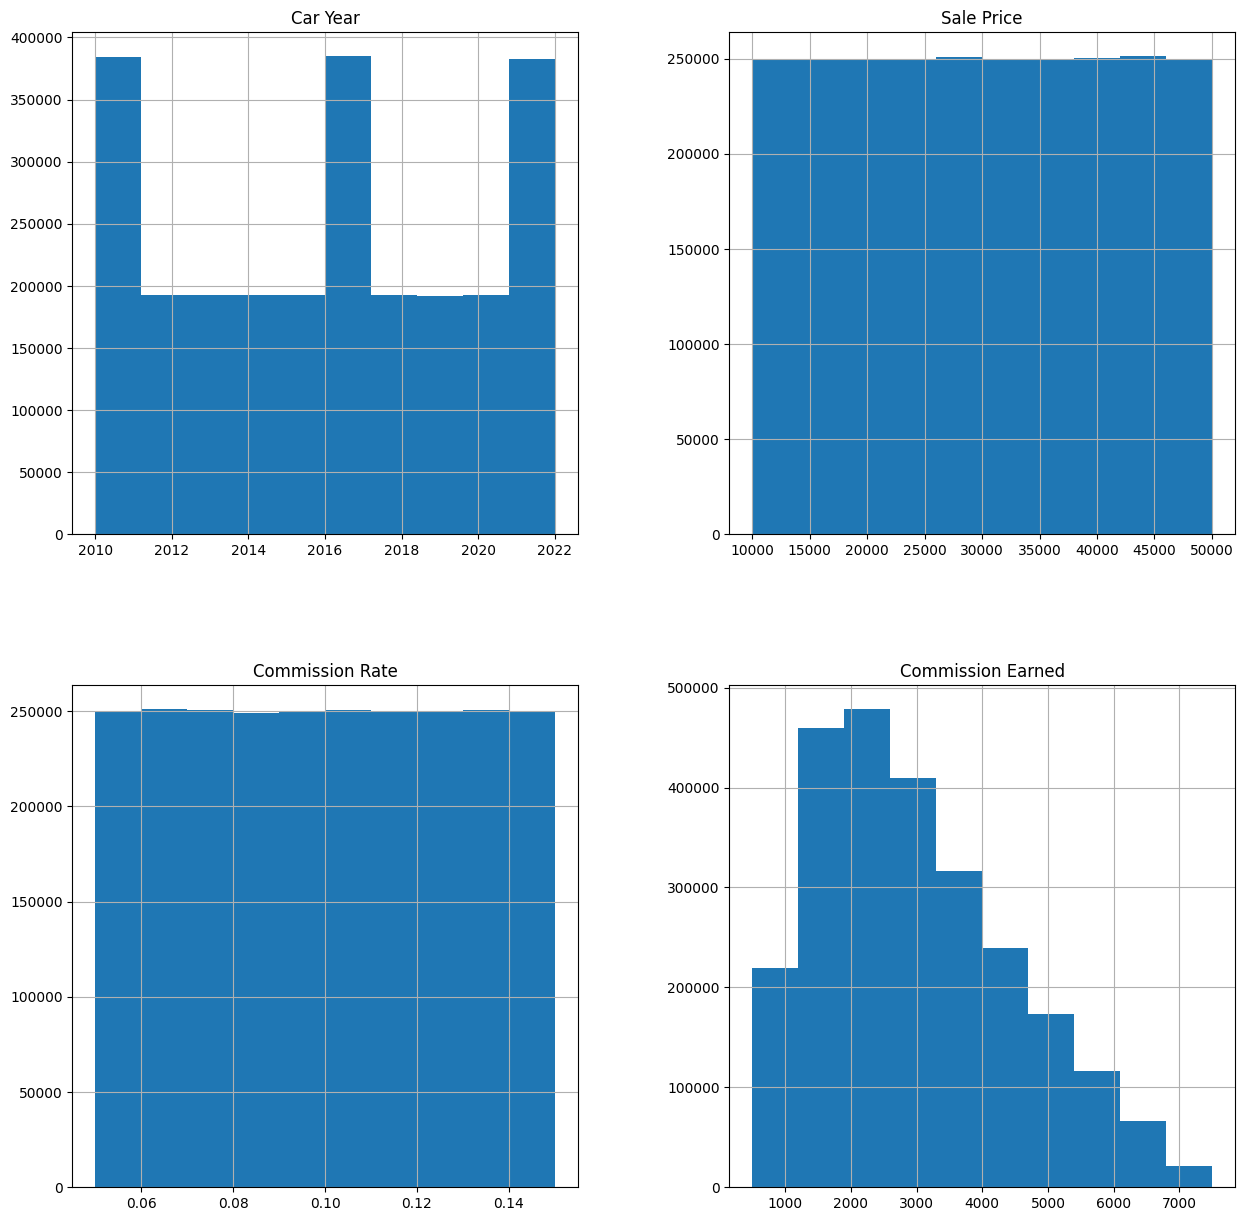

In [7]:
cars.hist(figsize=(15,15))
plt.show()

### 3.2 - Look for correlations between the features.

#### 3.2.1 - Correlation between attributes using sns.pairplot.

In [8]:
# sns.pairplot(cars)

#### 3.2.2 - Correlations using Pearson correlation coefficient.

In [9]:
corr_matrix = cars.corr(numeric_only=True)

corr_matrix["Sale Price"].sort_values(ascending=False)

Sale Price           1.000000
Commission Earned    0.779319
Commission Rate      0.000474
Car Year            -0.000667
Name: Sale Price, dtype: float64

#### 3.2.3 - Correlations with regard to our target.

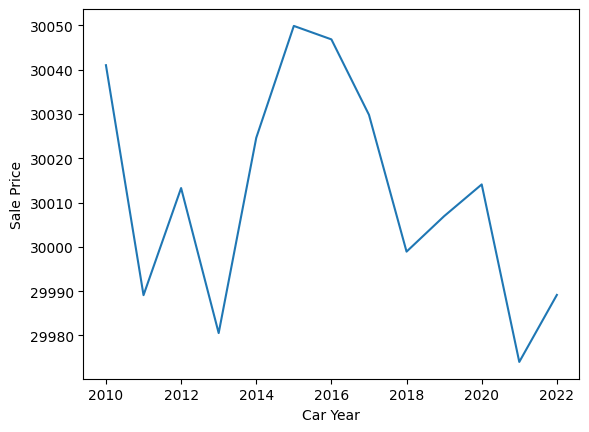

In [10]:
year_vs_price = sns.lineplot(x="Car Year", y="Sale Price", data=cars, errorbar=None)

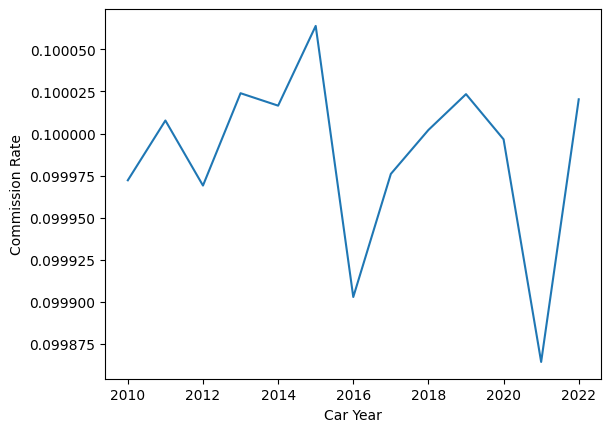

In [11]:
year_vs_comm = sns.lineplot(x="Car Year", y="Commission Rate", data=cars, errorbar=None)

### 3.3 - Look at the structure of Car Make and Car Model

In [12]:
count_make = cars["Car Make"].value_counts()
count_make

Car Make
Honda        500687
Chevrolet    500455
Toyota       500147
Ford         499781
Nissan       498930
Name: count, dtype: int64

In [13]:
count_model = cars["Car Model"].value_counts()
count_model

Car Model
Silverado    500842
Civic        500498
Corolla      500162
F-150        499679
Altima       498819
Name: count, dtype: int64

Car Make
Honda        30032.532548
Nissan       30016.451923
Chevrolet    30015.431557
Toyota       30001.989895
Ford         29994.461240
Name: Sale Price, dtype: float64


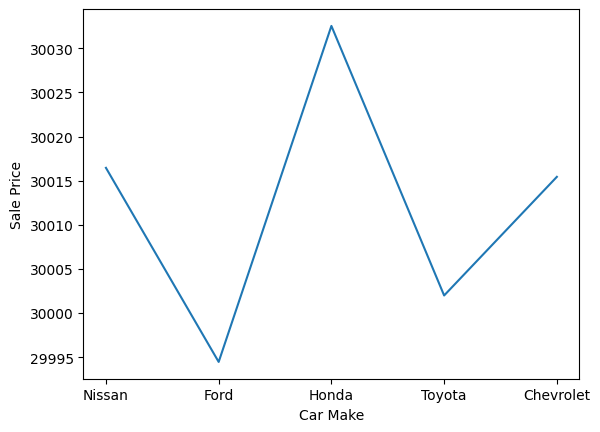

In [14]:
make_vs_price = sns.lineplot(x="Car Make", y="Sale Price", data=cars, errorbar=None)

average_price_by_make = cars.groupby('Car Make')['Sale Price'].mean().sort_values(ascending=False)
print(average_price_by_make)

Car Model
Silverado    30030.179052
Corolla      30023.817657
Altima       30022.035803
F-150        29995.522253
Civic        29989.340197
Name: Sale Price, dtype: float64


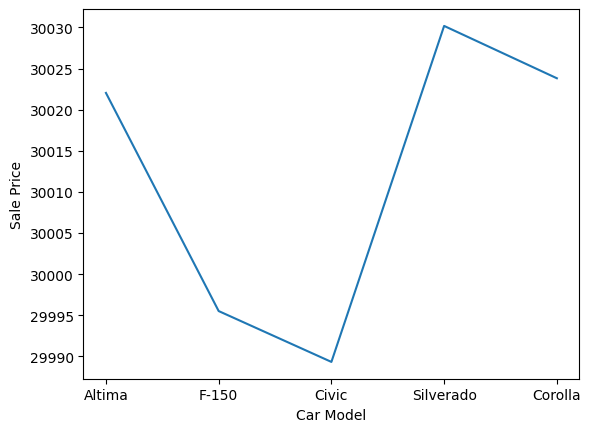

In [15]:
model_vs_price = sns.lineplot(x="Car Model", y="Sale Price", data=cars, errorbar=None)

average_price_by_model = cars.groupby('Car Model')['Sale Price'].mean().sort_values(ascending=False)
print(average_price_by_model)

## 4 - Preprocessing.

### 4.1 - Check for duplicate rows and remove them if any.

In [16]:
cars.duplicated().sum()

0

### 4.2 - Handle the missing values.

In [17]:
cars = cars.replace('?', np.nan)
cars.isna().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

### 4.3 - Create a pipeline.

In [18]:
X = cars.drop(["Sale Price"], axis = 1)
y = cars["Sale Price"]

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_cols = X.select_dtypes(include='number').columns.to_list()
cat_cols = X.select_dtypes(exclude='number').columns.to_list()

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# Use ColumnTransformer to set the estimators and transformations
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols), ('cat', cat_pipeline, cat_cols)]
                                  , remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Car Year', 'Commission Rate',
                                  'Commission Earned']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Date', 'Salesperson', 'Customer Name',
                                  'Car Make', 'Car Model'])])

In [20]:
X_prep = preprocessing.fit_transform(X)
X_prep = X_prep.toarray()


: 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2000000, 8) (2000000,) (500000, 8) (500000,)


## 5 - Model Selection.

### 5.1 - Ridge Regression.

#### 5.1.1 - Cross validation with training dataset

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = Ridge()

k_folds = 10
cv_scores = cross_validate(
    estimator = lr_model,
    X = X_train, 
    y = y_train, 
    cv = k_folds, 
    scoring = ('neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'),
    return_train_score = False
)

lr_train_perf = {
    "rmse": -1 * np.mean(cv_scores['test_neg_root_mean_squared_error']),
    "mae" : -1 * np.mean(cv_scores['test_neg_mean_absolute_error']),
    "r2"  : np.mean(cv_scores['test_r2'])
}
lr_train_perf

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py", line 1123, in fit
    X, y = self._validate_data(
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py", line 1146, in check_X_y
    X = check_array(
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/pandas/core/generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: '2022-11-28'

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py", line 1123, in fit
    X, y = self._validate_data(
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py", line 1146, in check_X_y
    X = check_array(
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/harshparmar/Library/Python/3.9/lib/python/site-packages/pandas/core/generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: '2022-07-08'
